In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
path_to_data = '/home/neuronas/Videos for Course Project/'

In [ ]:
path_to_data = 'C:/Users/Human/Documents/Adobe/Premiere Pro/22.0/'

In [ ]:
frames = np.zeros((54354,270,480,3), dtype='u1')
labels = []

In [ ]:
cap1 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_1.mp4')
cap2 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_2.mp4')
cap3 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_3.mp4')
cap4 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_4.mp4')
cap5 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_5.mp4')
while cap1.isOpened():
    ret1, frame1 = cap1.read()
    _, frame2 = cap2.read()
    _, frame3 = cap3.read()
    _, frame4 = cap4.read()
    _, frame5 = cap5.read()
    if not ret1:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    max_frame_1 = (np.max(frame1) > 5) * 1
    max_frame_2 = (np.max(frame2) > 5) * 2
    max_frame_3 = (np.max(frame3) > 5) * 3
    max_frame_4 = (np.max(frame4) > 5) * 4
    max_frame_5 = (np.max(frame5) > 5) * 5
    # print(frame1)
    # break
    # frames.append(frame1+frame2+frame3+frame4+frame5)
    frames[len(labels)] = cv.resize([frame1,frame2,frame3,frame4,frame5][max(max_frame_1,max_frame_2,max_frame_3,max_frame_4,max_frame_5)-1], (480,270))
    if (len(labels) % 1000 == 0):
      print(len(labels))
    labels.append(max(max_frame_1,max_frame_2,max_frame_3,max_frame_4,max_frame_5))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
Can't receive frame (stream end?). Exiting ...


In [ ]:
len(labels)

54354

In [ ]:
np.max(labels)

5

In [ ]:
np.save('frames.npy',frames)

NameError: name 'np' is not defined

In [ ]:
np.save('lables.npy',labels)

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, losses
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
frames = np.load('frames.npy', mmap_mode='c')
labels = np.load('lables.npy', mmap_mode='c')

In [ ]:
frames_number = 11
batch_size = 128

In [ ]:
def set_frame_classifier():
  model = models.Sequential([
    tf.keras.Input(shape=(frames_number, 270, 480, 3)),
    layers.Permute((2, 3, 1, 4)),
    layers.Reshape((270, 480, 3*frames_number)),
    layers.Rescaling(scale=1/.256),
    layers.Conv2D(80, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(80, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
  ])
  return model

In [ ]:
def set_frame_classifier():
  model = models.Sequential([
    tf.keras.Input(shape=(frames_number, 270, 480, 3)),
    layers.Rescaling(scale=1/.256),
    layers.Conv3D(3*frames_number, (frames_number,1,1), padding='valid', activation='tanh'),
    layers.Reshape((270, 480, 3*frames_number)),
    layers.MaxPooling2D(),
    layers.Conv2D(80, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
  ])
  return model

In [ ]:
model = set_frame_classifier()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 270, 480, 11, 3)   0         
                                                                 
 reshape (Reshape)           (None, 270, 480, 33)      0         
                                                                 
 rescaling (Rescaling)       (None, 270, 480, 33)      0         
                                                                 
 conv2d (Conv2D)             (None, 270, 480, 80)      23840     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 135, 240, 80)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 135, 240, 80)      57680     
                                                        

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
X_size = len(frames)
X_size

54354

In [ ]:
import gc

In [ ]:
!sensors

"sensors" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
gc.collect()

0

In [ ]:
# for i in range((X_size // 10)-2):
for e in range(10):
  X = []
  index = np.random.randint(0, X_size-frames_number, batch_size)
  for j in range(batch_size):
    X.append(np.array(frames[index[j]:(index[j]+frames_number)]))
  X = np.array(X, dtype='i1')
  y = tf.one_hot((labels[index+frames_number//2]-1).reshape(batch_size,), depth=5)
  model.fit(X, y, epochs=5)
  gc.collect()

Epoch 1/5
4/4 [==============================] - 16s 394ms/step - loss: 1.3656 - accuracy: 0.5078
Epoch 2/5
4/4 [==============================] - 1s 372ms/step - loss: 0.9523 - accuracy: 0.6797
Epoch 3/5
4/4 [==============================] - 2s 404ms/step - loss: 0.6774 - accuracy: 0.7422
Epoch 4/5
4/4 [==============================] - 2s 411ms/step - loss: 0.5708 - accuracy: 0.7969
Epoch 5/5
4/4 [==============================] - 1s 367ms/step - loss: 0.4732 - accuracy: 0.8203
Epoch 1/5
4/4 [==============================] - 3s 715ms/step - loss: 0.6857 - accuracy: 0.6875
Epoch 2/5
4/4 [==============================] - 2s 437ms/step - loss: 0.6311 - accuracy: 0.6953
Epoch 3/5
4/4 [==============================] - 2s 402ms/step - loss: 0.4737 - accuracy: 0.8047
Epoch 4/5
4/4 [==============================] - 1s 345ms/step - loss: 0.3727 - accuracy: 0.8750
Epoch 5/5
4/4 [==============================] - 1s 341ms/step - loss: 0.2853 - accuracy: 0.9219
Epoch 1/5
4/4 [==============

In [ ]:
gc.collect()

0

In [ ]:
# import os

# base_path = 'D:\\NN_answers'

matrix = [[0 for i in range(5)] for i in range(5)]

temp_batch_size = 1024

predictions = np.array([])
# for index in range(X_size//temp_batch_size//3,2*X_size//temp_batch_size//3):
for index in range(X_size//temp_batch_size):
  X = []
  y = []
  for j in range(temp_batch_size):
    X.append(np.array(frames[index*temp_batch_size+j:(index*temp_batch_size+j+frames_number)], dtype='i1'))
    y.append(labels[index*temp_batch_size+j+frames_number//2]-1)
  X = np.array(X, dtype='i1')
  y = np.array(y)
  pred = np.argmax(model.predict(X),axis=1)
  for p,t in zip(pred, y):
    matrix[t][p] += 1
  gc.collect()
  print(matrix)
  predictions = np.concatenate((predictions, pred))
  print(predictions.shape)

32/32 [==============================] - 2s 66ms/step
[[586, 396, 5, 31, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(1024,)
32/32 [==============================] - 2s 67ms/step
[[1473, 508, 9, 52, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(2048,)
32/32 [==============================] - 2s 67ms/step
[[2096, 882, 9, 79, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(3072,)
32/32 [==============================] - 2s 67ms/step
[[2995, 965, 9, 121, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(4096,)
32/32 [==============================] - 2s 66ms/step
[[3931, 1048, 11, 124, 6], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(5120,)
32/32 [==============================] - 2s 66ms/step
[[4511, 1447, 14, 165, 7], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
(6144,)
32/32 [==============================] - 2s 66ms/step
[[5051, 1759, 21

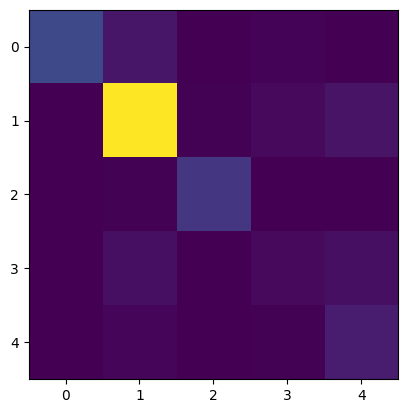

In [ ]:
plt.imshow(np.array(matrix))

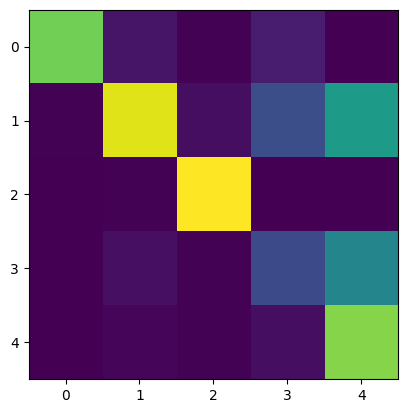

In [ ]:
plt.imshow(np.array(matrix)/np.sum(np.array(matrix),axis=1))

In [ ]:
labels = np.load('lables.npy', mmap_mode='c')

In [ ]:
# classes_for_video = labels
classes_for_video = np.array(predictions+1, dtype=int)

result_list = []
current_segment = [classes_for_video[0], 0, 0]

for i in range(1, len(classes_for_video)):
    if classes_for_video[i] == current_segment[0]:
        current_segment[2] = i
    else:
        result_list.append(current_segment)
        current_segment = [classes_for_video[i], i, i]

# Добавляем последний сегмент
result_list.append(current_segment)

print(result_list)


[[3, 0, 8], [1, 9, 19], [2, 20, 20], [1, 21, 24], [2, 25, 26], [3, 27, 27], [1, 28, 64], [2, 65, 66], [1, 67, 196], [2, 197, 199], [1, 200, 294], [2, 295, 300], [1, 301, 404], [2, 405, 408], [5, 409, 410], [2, 411, 412], [5, 413, 413], [2, 414, 414], [1, 415, 415], [5, 416, 416], [2, 417, 417], [1, 418, 489], [2, 490, 493], [1, 494, 495], [2, 496, 499], [5, 500, 501], [2, 502, 502], [5, 503, 505], [1, 506, 511], [3, 512, 513], [2, 514, 514], [5, 515, 516], [2, 517, 518], [1, 519, 528], [2, 529, 529], [1, 530, 622], [2, 623, 623], [1, 624, 625], [2, 626, 626], [1, 627, 628], [2, 629, 629], [1, 630, 630], [3, 631, 632], [1, 633, 636], [2, 637, 649], [1, 650, 650], [2, 651, 655], [1, 656, 656], [2, 657, 659], [1, 660, 660], [2, 661, 662], [1, 663, 663], [2, 664, 672], [1, 673, 674], [2, 675, 676], [1, 677, 677], [2, 678, 678], [1, 679, 681], [2, 682, 683], [1, 684, 684], [2, 685, 686], [1, 687, 688], [2, 689, 689], [1, 690, 690], [2, 691, 692], [1, 693, 693], [2, 694, 697], [1, 698, 698],

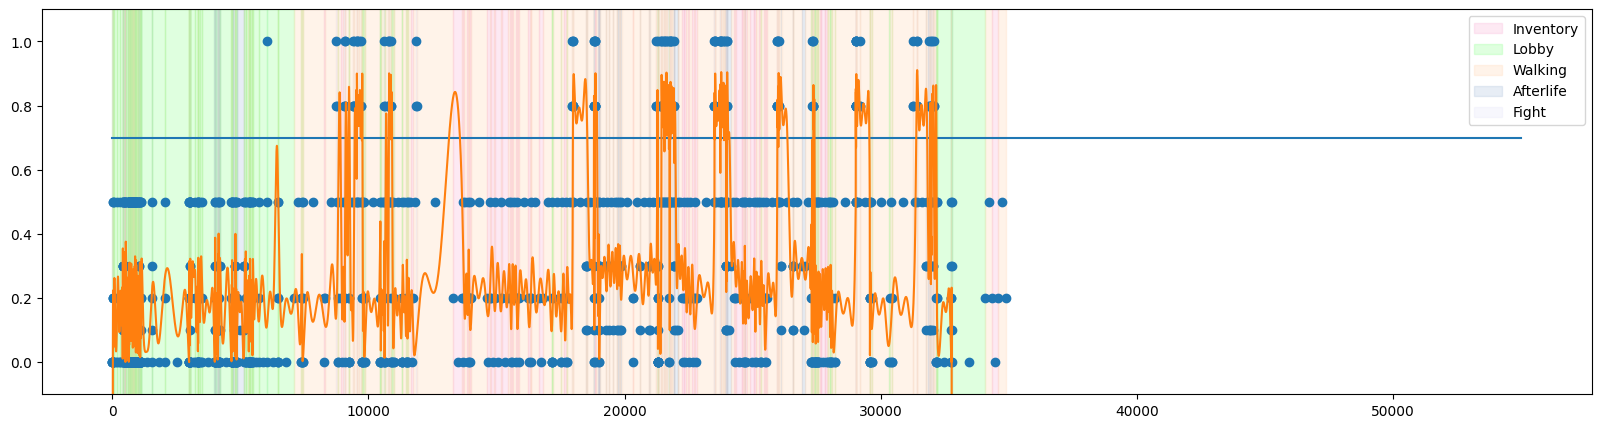

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
plt.figure(figsize=(20,5))
classes = ['Lobby', 'Walking', 'Inventory', 'Fight', 'Afterlife']
colors = ['#98FF98','#FFDAB9','#FAB8D9','#E6E6FA','#B0C4DE']
interests = [0, 0.5, 0, 1, 0.1]
primes = [[.0, .2, .0, .5, .0],
          [.0, .0, .2, .8, .3],
          [.0, .2, .0, .5, .0],
          [.0, .8, .1, .0, .3],
          [.0, .3, .0, .8, .0]]

bool_list = [True, True, True, True, True]

x = [-2,-1]
y = [0,0]
for i, rl in enumerate(result_list[:-1]):
  c, s, f = rl
  label = None
  if bool_list[c-1]:
    label = classes[c-1]
    bool_list[c-1] = False
  plt.axvspan(s, f, color=colors[c-1], alpha=0.3, label=label)
  x.append((s+f)/2)
  y.append(interests[c-1])
  x.append(f)
  y.append(primes[c-1][result_list[i+1][0]-1])

x = np.array(x)
x_ = x.copy()
y = np.array(y)
y_ = y.copy()

horizontal_line = [[0.70, 0.70], [0, 55000]]
plt.plot(horizontal_line[1], horizontal_line[0])

X_Y_Spline = BSpline(x, y, 10)
X_ = np.linspace(x.min(), x.max(), 55000)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
# plt.xlim(6500, 32500)
plt.scatter(x, y)
# plt.xlim(30000,35000)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

In [ ]:
cap1 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_1.mp4')
cap2 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_2.mp4')
cap3 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_3.mp4')
cap4 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_4.mp4')
cap5 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_5.mp4')

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('video1.mp4',fourcc,30,(698,384))
i = 0
while cap1.isOpened():
    ret1, frame1 = cap1.read()
    _, frame2 = cap2.read()
    _, frame3 = cap3.read()
    _, frame4 = cap4.read()
    _, frame5 = cap5.read()
    if not ret1:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    sp_z = X_Y_Spline(i)
    if sp_z > 0.7 and sp_z < 1.1:
      max_frame_1 = (np.max(frame1) > 5) * 1
      max_frame_2 = (np.max(frame2) > 5) * 2
      max_frame_3 = (np.max(frame3) > 5) * 3
      max_frame_4 = (np.max(frame4) > 5) * 4
      max_frame_5 = (np.max(frame5) > 5) * 5

      frame = [frame1,frame2,frame3,frame4,frame5][max(max_frame_1,max_frame_2,max_frame_3,max_frame_4,max_frame_5)-1]

      cv.putText(frame, str(sp_z),
          (10,50),
          cv.FONT_HERSHEY_SIMPLEX,
          1,
          (255,255,255),
          1,
          2)
      cv.putText(frame, classes[classes_for_video[i]-1],
          (10,100),
          cv.FONT_HERSHEY_SIMPLEX,
          1,
          (255,255,255),
          1,
          2)
      video.write(frame)
    if (i % 1000 == 0):
      print(i)
    i+=1
cv.destroyAllWindows()
video.release()

0
1000


KeyboardInterrupt: 

# Прототип для монтажа новых видео

Backbone модель

In [ ]:
video_filename = '2019-12-01 21-14-57_1.mp4'

In [ ]:
from time import time

In [ ]:
cap = cv.VideoCapture(path_to_data+video_filename)

interfer_frames = []
interfer_pred = []
temp_pred = []
i = 0

temp_batch_size = 1024

rerun_time_sum = 0
read_time_sum = 0
append_time_sum = 0
reshape_time_sum = 0
interfer_time_sum = 0
del_time_sum = 0

rerun_time = time()

while cap.isOpened():
    rerun_time_sum += time() - rerun_time
    rerun_time = time()

    read_time = time()
    ret, frame = cap.read()
    read_time_sum += time() - read_time
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    append_time = time()
    interfer_frames.append(cv.resize(frame, (480,270)))
    append_time_sum += time() - append_time

    if (len(interfer_frames) == temp_batch_size+frames_number):
      reshape_time = time()
      X = np.lib.stride_tricks.sliding_window_view(np.array(interfer_frames, dtype='i1'), (frames_number,270,480,3)).reshape(temp_batch_size+1, frames_number, 270, 480, 3)
      reshape_time_sum += time() - reshape_time
      # print(X.shape)
      interfer_time = time()
      temp_pred = np.argmax(model.predict(X),axis=1)
      interfer_time_sum += time() - interfer_time

      append_time = time()
      interfer_pred = np.concatenate((interfer_pred, temp_pred))
      append_time_sum += time() - append_time

      del_time = time()
      del interfer_frames[:-frames_number]
      del_time_sum += time() - del_time
      gc.collect()
      # break
    if (i % 1000 == 0):
      print(i)
    i+=1

0
1000
33/33 [==============================] - 8s 249ms/step
2000
33/33 [==============================] - 8s 244ms/step
3000
33/33 [==============================] - 8s 254ms/step
4000
33/33 [==============================] - 10s 304ms/step
5000
33/33 [==============================] - 10s 302ms/step
6000
33/33 [==============================] - 9s 290ms/step
7000
33/33 [==============================] - 5s 147ms/step
8000
33/33 [==============================] - 5s 145ms/step
9000
33/33 [==============================] - 4s 133ms/step
10000
33/33 [==============================] - 4s 122ms/step
11000
33/33 [==============================] - 4s 121ms/step
12000
33/33 [==============================] - 4s 115ms/step
13000
33/33 [==============================] - 4s 115ms/step
14000
33/33 [==============================] - 4s 114ms/step
15000
33/33 [==============================] - 4s 115ms/step
16000
33/33 [==============================] - 4s 120ms/step
17000
33/33 [================

In [ ]:
print(rerun_time_sum)
print(read_time_sum)
print(append_time_sum)
print(reshape_time_sum)
print(interfer_time_sum)
print(del_time_sum)

292.4991216659546
38.823108434677124
9.868448495864868
4.218084812164307
220.86161589622498
0.6086342334747314


Алгоритм постобработки

In [ ]:
# classes_for_video = labels
interfer_labels = np.array(interfer_pred+1, dtype=int)
interfer_labels = labels

result_list = []
current_segment = [interfer_labels[0], 0, 0]

for i in range(1, len(interfer_labels)):
    if interfer_labels[i] == current_segment[0]:
        current_segment[2] = i
    else:
        result_list.append(current_segment)
        current_segment = [interfer_labels[i], i, i]

# Добавляем последний сегмент
result_list.append(current_segment)

print(result_list)


[[1, 0, 7097], [2, 7098, 8263], [3, 8264, 8301], [2, 8302, 11665], [3, 11666, 11739], [2, 11740, 13319], [3, 13320, 13647], [2, 13648, 13855], [3, 13856, 13873], [2, 13874, 13957], [3, 13958, 14009], [2, 14010, 14631], [3, 14632, 14709], [2, 14710, 14797], [3, 14798, 14895], [2, 14896, 14959], [3, 14960, 15179], [2, 15180, 15205], [3, 15206, 15429], [2, 15430, 15545], [3, 15546, 15567], [2, 15568, 15593], [3, 15594, 15633], [2, 15634, 15747], [3, 15748, 15755], [2, 15756, 15777], [3, 15778, 15789], [2, 15790, 15823], [3, 15824, 15883], [2, 15884, 16245], [3, 16246, 16319], [2, 16320, 16343], [3, 16344, 16349], [2, 16350, 16677], [3, 16678, 16775], [2, 16776, 16799], [3, 16800, 16825], [2, 16826, 17619], [3, 17620, 17693], [2, 17694, 18787], [4, 18788, 18861], [2, 18862, 21239], [4, 21240, 21305], [2, 21306, 21907], [4, 21908, 21929], [5, 21930, 22079], [2, 22080, 22243], [3, 22244, 22305], [2, 22306, 22329], [3, 22330, 22355], [2, 22356, 22493], [3, 22494, 22521], [2, 22522, 22617], [3

In [ ]:
interests = {1:0, 2:0.5, 3:0, 4:1, 5:0.1}
x = np.array(list(map(interests.get, interfer_labels)))

In [ ]:
w = 1-np.array([0.0438207512339, 0.171965689567, 0.171965689567, 0.820402421376, 0.9973557, 0.820402421376, 0.171965689567, 0.171965689567, 0.0438207512339])
N = 100
y1 = np.convolve(x, np.ones(N)/N, mode='valid')
y2 = np.convolve(x, w/np.sum(w), mode='valid')

In [ ]:
N = 200
y11 = np.convolve(y1, np.ones(N)/N, mode='valid')
y12 = np.convolve(y1, w/np.sum(w), mode='valid')
y21 = np.convolve(y2, np.ones(N)/N, mode='valid')
y22 = np.convolve(y2, w/np.sum(w), mode='valid')

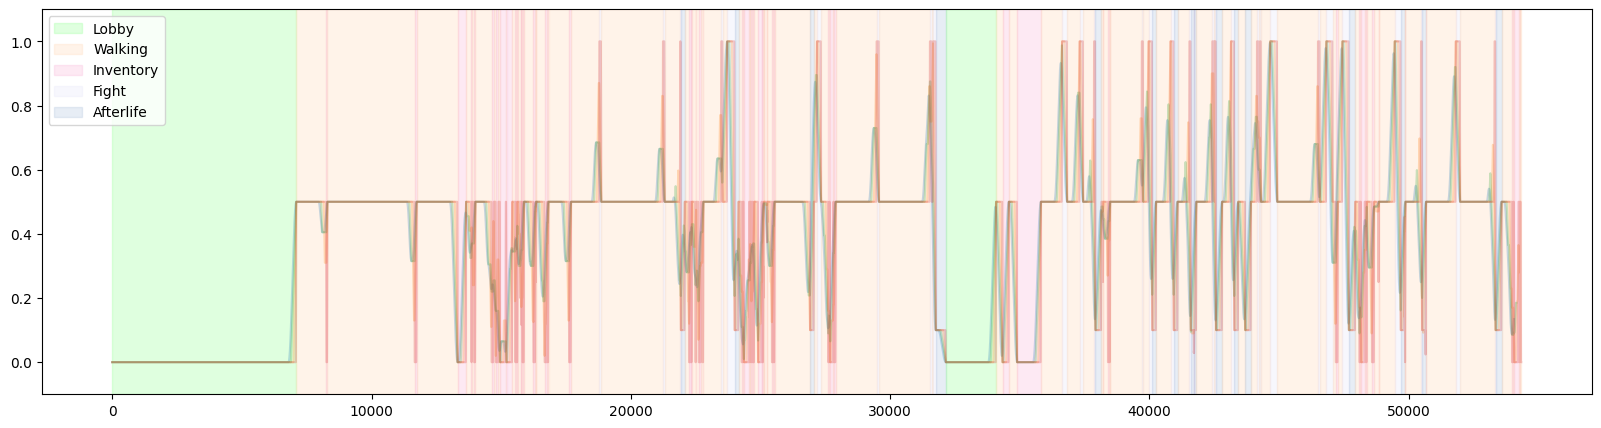

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
plt.figure(figsize=(20,5))
classes = ['Lobby', 'Walking', 'Inventory', 'Fight', 'Afterlife']
colors = ['#98FF98','#FFDAB9','#FAB8D9','#E6E6FA','#B0C4DE']

bool_list = [True, True, True, True, True]

for i, rl in enumerate(result_list[:-1]):
  c, s, f = rl
  label = None
  if bool_list[c-1]:
    label = classes[c-1]
    bool_list[c-1] = False
  plt.axvspan(s, f, color=colors[c-1], alpha=0.3, label=label)

# horizontal_line = [[0.70, 0.70], [0, interfer_pred.shape[0]]]
# plt.plot(horizontal_line[1], horizontal_line[0])

# plt.plot(x, alpha=0.1)
plt.plot(y11, alpha=0.25)
plt.plot(y12, alpha=0.25)
plt.plot(y21, alpha=0.25)
plt.plot(y22, alpha=0.25)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

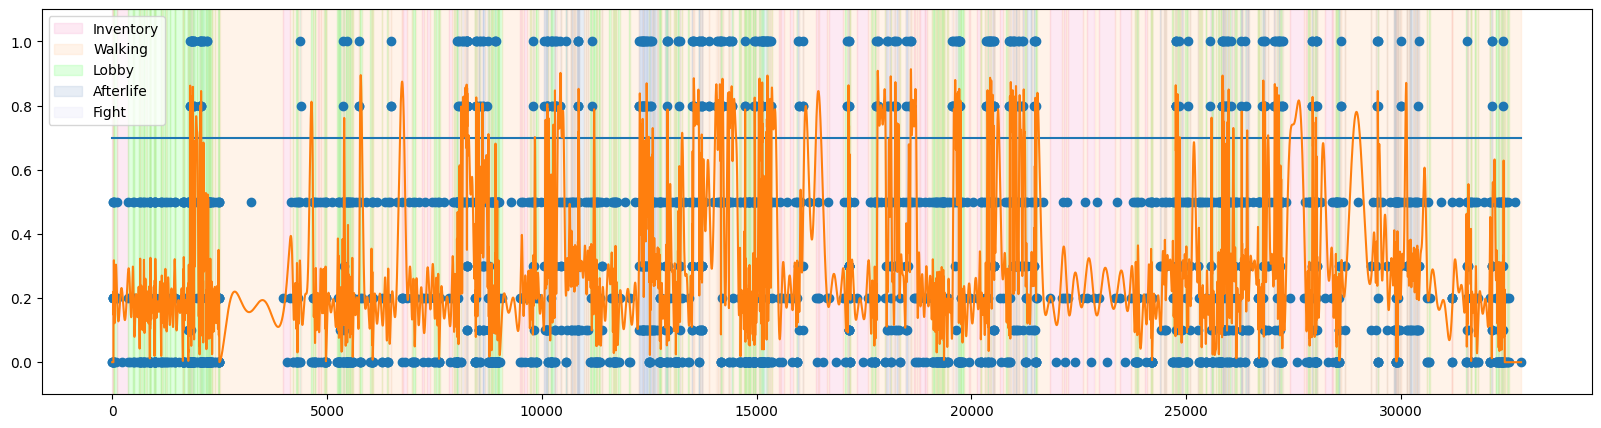

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
plt.figure(figsize=(20,5))
classes = ['Lobby', 'Walking', 'Inventory', 'Fight', 'Afterlife']
colors = ['#98FF98','#FFDAB9','#FAB8D9','#E6E6FA','#B0C4DE']
interests = [0, 0.5, 0, 1, 0.1]
primes = [[.0, .2, .0, .5, .0],
          [.0, .0, .2, .8, .3],
          [.0, .2, .0, .5, .0],
          [.0, .8, .1, .0, .3],
          [.0, .3, .0, .8, .0]]

bool_list = [True, True, True, True, True]

x = [-2,-1]
y = [0,0]
for i, rl in enumerate(result_list[:-1]):
  c, s, f = rl
  label = None
  if bool_list[c-1]:
    label = classes[c-1]
    bool_list[c-1] = False
  plt.axvspan(s, f, color=colors[c-1], alpha=0.3, label=label)
  x.append((s+f)/2)
  y.append(interests[c-1])
  x.append(f)
  y.append(primes[c-1][result_list[i+1][0]-1])

x = np.array(x)
x_ = x.copy()
y = np.array(y)
y_ = y.copy()

horizontal_line = [[0.70, 0.70], [0, interfer_pred.shape[0]]]
plt.plot(horizontal_line[1], horizontal_line[0])

X_Y_Spline = BSpline(x, y, 10)
X_ = np.linspace(x.min(), x.max(), interfer_pred.shape[0])
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
# plt.xlim(6500, 32500)
plt.scatter(x, y)
# plt.xlim(30000,35000)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

Create new video

In [ ]:
cap = cv.VideoCapture(path_to_data+video_filename)

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('video4.mp4',fourcc,30,(1280,720))
i = 0
j = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    sp_z = X_Y_Spline(i)
    if sp_z > 0.7 and sp_z < 1.1:
      j+=1

      cv.putText(frame, str(sp_z),
          (10,50),
          cv.FONT_HERSHEY_SIMPLEX,
          1,
          (255,255,255),
          1,
          2)
      cv.putText(frame, classes[interfer_labels[i]-1],
          (10,100),
          cv.FONT_HERSHEY_SIMPLEX,
          1,
          (255,255,255),
          1,
          2)
      video.write(frame)
    if (i % 1000 == 0):
      print(i)
    i+=1
print(j)
cv.destroyAllWindows()
video.release()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
Can't receive frame (stream end?). Exiting ...
2313
